In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from utils import *
from ipywidgets import interact, widgets
from scipy import stats
np.set_printoptions(precision=3)
from mpl_toolkits.mplot3d import Axes3D

# 0. The curse of dimensionality

## What percentage of points in a square of side length 2 are contained in a circle of radius 1?

In [2]:
np.random.seed(0)
num_points = 2000
dim_points = 2
points = np.random.uniform(-1, 1, [num_points, 2])
points_within_sphere = np.sum((points[:, 0]**2 + points[:, 1]**2) <= 1)
print(f"{100.0 * float(points_within_sphere) / num_points}% of points are within a radius 1 of the origin")

78.55% of points are within a radius 1 of the origin


## Let's visualize

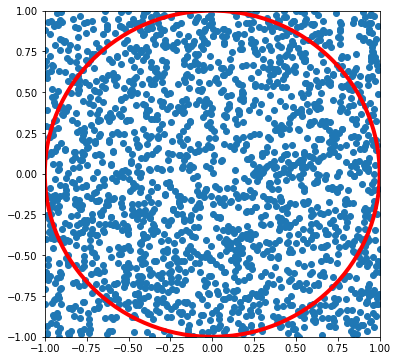

In [3]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.xlim(-1, 1)
plt.ylim(-1, 1)
circle = plt.Circle((0, 0), 1.0, fill=False, color='r', lw=4)
plt.scatter(points[:, 0], points[:, 1])
ax.add_artist(circle)

## What happens when we go to higher dimensions?

Text(0,0.5,'Fraction of points within a sphere of radius 1')

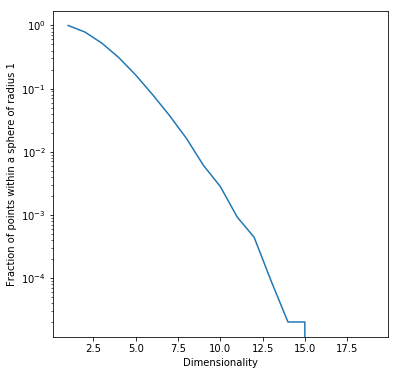

In [4]:
num_points = 100000 # 100 thousand
max_dim = 20
percents_within_sphere = []
for dim_points in range(1, max_dim, 1):
    points = np.random.uniform(-1, 1, [num_points, dim_points])
    points_within_sphere = np.sum(np.linalg.norm(points, axis=-1) <= 1)
    percents_within_sphere.append(float(points_within_sphere) / num_points)

plt.figure(figsize=(6, 6))
plt.plot(np.arange(1, max_dim, 1), percents_within_sphere)
plt.semilogy()
plt.xlabel("Dimensionality")
plt.ylabel("Fraction of points within a sphere of radius 1")

# 1. PCA

## Intuition: Find redundant dimensions of your data

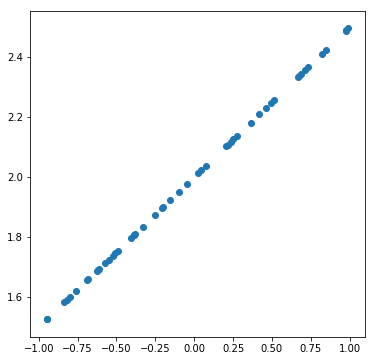

In [5]:
x = np.random.uniform(-1, 1, 50)
y = 0.5* x + 2
plt.figure(figsize=(6, 6))
plt.scatter(x, y)

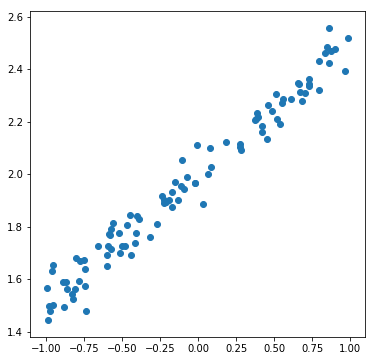

In [6]:
x = np.random.uniform(-1, 1, 100)
y = 0.5* x + 2
plt.figure(figsize=(6, 6))
plt.scatter(x, y + 0.05 * np.random.randn(*y.shape))

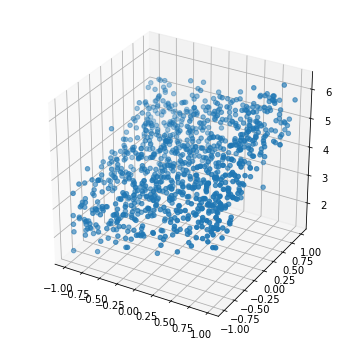

In [7]:
xy = np.random.uniform(-1, 1, (1000, 2))
x, y = xy[:, 0], xy[:, 1]
z = 0.5 * x + 1.0 * y + 4
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z + 0.5 * np.random.randn(*z.shape))

## Let's find the principal components of a simple dataset

In [8]:
# Generate a simple dataset
x = np.random.uniform(-1, 1, 100)
y = 0.5* x + 2 + 0.05 * np.random.randn(100)
xy_raw = np.column_stack([x, y])

In [9]:
# Now center the data
def center(X):
    return X - np.mean(X, axis=0)
xy = center(xy_raw)

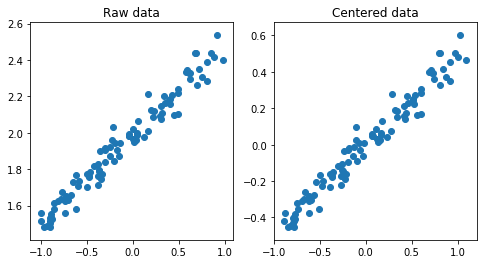

In [10]:
# Compare the datasets
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.title("Raw data")
plt.scatter(xy_raw[:, 0], xy_raw[:, 1])
plt.subplot(122)
plt.title("Centered data")
plt.scatter(xy[:, 0], xy[:, 1])

In [11]:
# Let's look at the eigenvalues and eigenvectors of the centered data's covariance matrix
def cov(X):
    return (1 / X.shape[0]) * X.T.dot(X)

cov_x = cov(xy)
print(cov_x.shape)

(2, 2)


In [12]:
# Now we'll compute the eigenvalues and eigenvectors
eig, eigv = np.linalg.eig(cov_x)
print("Eigenvalues: ", eig)
print("Eigenvectors: ", eigv)

Eigenvalues:  [0.382 0.002]
Eigenvectors:  [[ 0.896 -0.443]
 [ 0.443  0.896]]


In [13]:
# Let's project the data on the first eigenvector
xy_proj = xy.dot(eigv[:, 0])
xy_proj

array([-0.12 , -0.506, -0.279,  1.183, -0.381, -0.087, -0.288, -0.666,
        0.797, -0.731,  0.566, -0.52 , -0.624, -0.062, -0.86 , -0.315,
       -0.402, -0.011, -0.068,  0.176,  1.11 ,  0.817,  0.376, -0.15 ,
       -0.182,  0.936,  0.282,  0.39 ,  0.373,  0.469, -0.894,  0.574,
       -0.931, -0.323,  0.212,  0.173, -0.882,  0.618,  0.15 ,  1.19 ,
        0.143,  0.367,  0.577, -0.705,  1.092, -0.263, -0.229, -0.609,
        0.934, -0.956,  0.231,  0.137,  0.945, -0.287, -0.978, -0.885,
        0.526,  0.982, -0.049, -0.53 , -0.676, -0.722, -0.448,  0.086,
        0.126,  0.676, -0.962,  0.516, -0.17 ,  0.826,  0.945, -0.333,
        0.872, -0.214, -0.692,  0.091,  0.567, -0.57 , -0.872,  1.026,
        0.826,  0.124, -0.816, -0.419, -0.405,  0.441, -0.76 , -0.806,
       -0.054, -0.866, -0.902, -0.289,  0.832,  0.603,  0.087,  0.468,
       -0.682,  0.671,  0.444, -0.12 ])

In [14]:
# Now let's make this more interpretable by reprojecting back into our original space
xy_reproj = xy_proj[:, None].dot(eigv[None, :, 0])

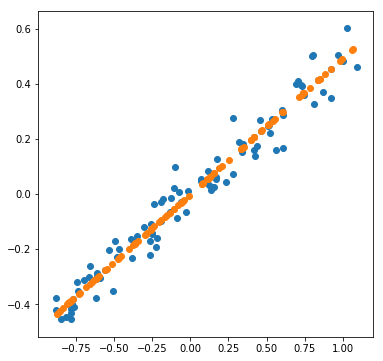

In [15]:
plt.figure(figsize=(6, 6))
plt.scatter(xy[:, 0], xy[:, 1])
plt.scatter(xy_reproj[:, 0], xy_reproj[:, 1])

## Fun with PCA - more complicated datasets

In [16]:
import tensorflow as tf

In [17]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [18]:
images_raw = mnist.train.images

In [19]:
def plot_mnist(vec):
    assert len(vec) == 28 * 28
    plt.imshow(vec.reshape([28, 28]))

In [20]:
# 1. Center. We will subtact the mean.
mnist_mean = np.mean(images_raw, axis=0, keepdims=True)
images = images_raw - mnist_mean
# 2. Eigenvalues and eigenvectors
cov = (1 / images.shape[0]) * images.T.dot(images)
eig, eigv = np.linalg.eig(cov)

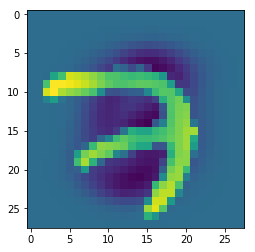

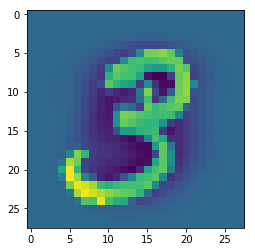

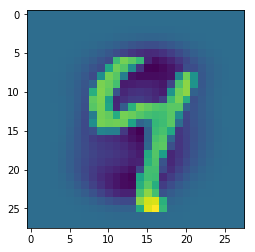

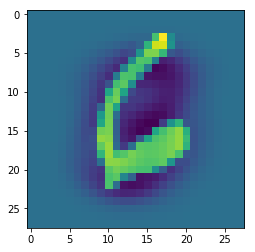

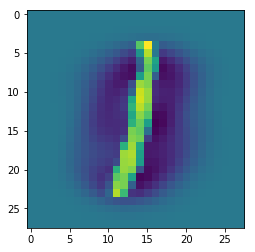

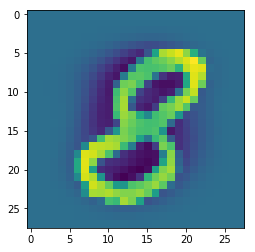

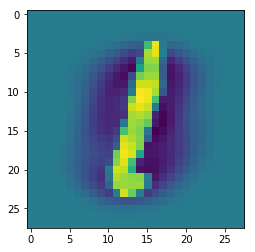

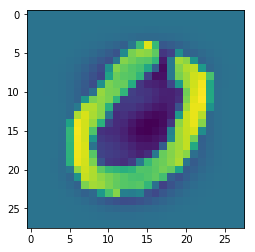

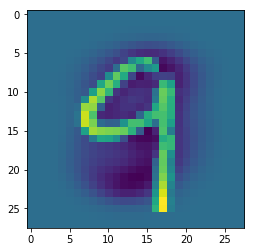

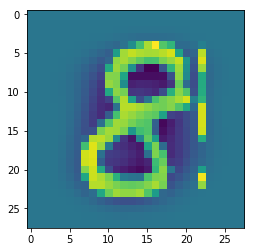

In [21]:
# Plot some centered mnist digits
for i in range(10):
    plt.figure()
    plot_mnist(images[i])
    plt.show()

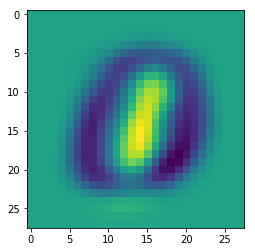

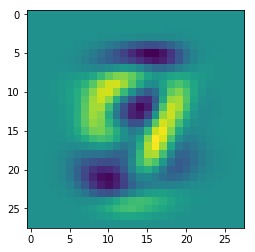

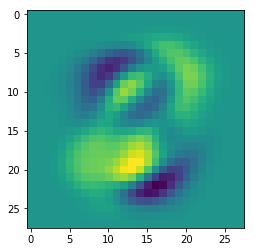

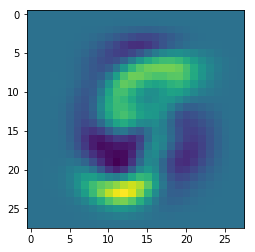

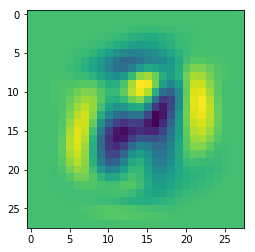

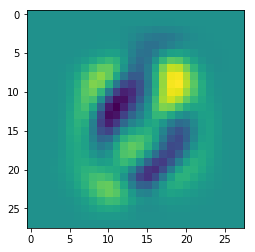

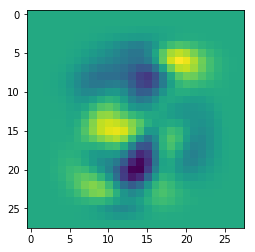

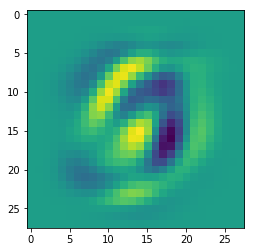

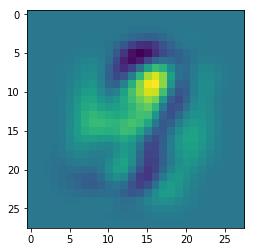

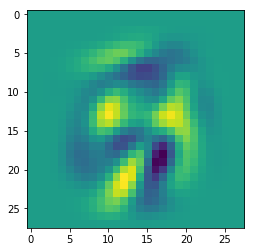

In [22]:
# Let's plot some of the eigenvectors
for i in range(10):
    plt.figure()
    plot_mnist(eigv[:, i])
    plt.show()

## How to choose the number of dimensions for our projection?

Explained variance: proportion of the total variance of the dataset explained by our projected data

How to compute?

k = our chosen subset dimensionality


    sum(eig[:k]) / sum(eig)

In [23]:
explained_variance = [np.sum(eig[:k]) / np.sum(eig) for k in range(0, len(eig) +1)] 

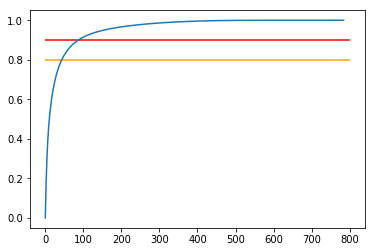

In [24]:
plt.figure()
plt.plot(explained_variance)
plt.hlines(0.8, 0, 800, color='orange')
plt.hlines(0.9, 0, 800, color='red')

## What do the reconstructions look like?

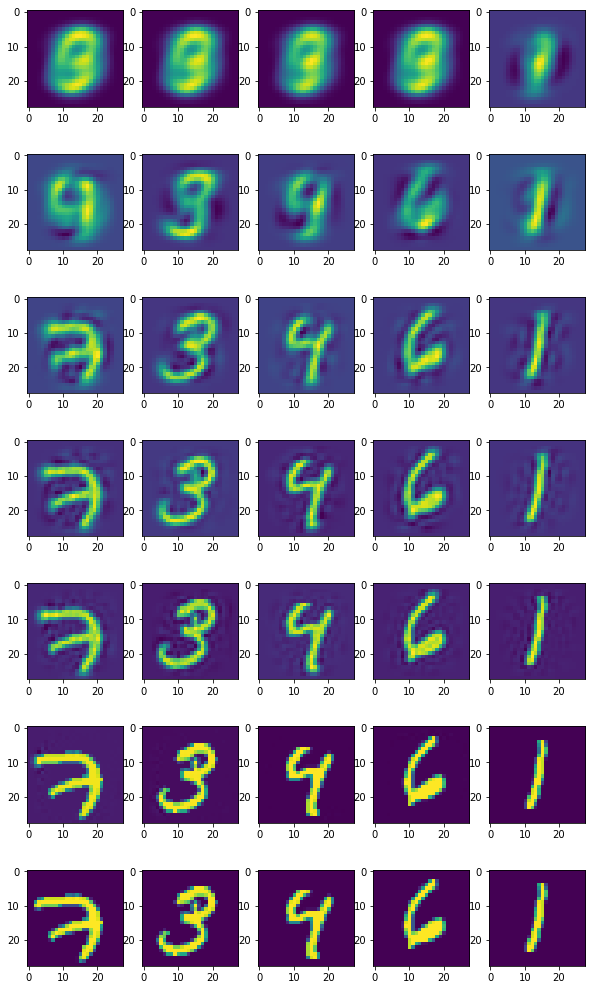

In [25]:
n_dims = [1, 10, 50, 100, 200, 500, 28*28]
mnist_mean = np.mean(images_raw, axis=0, keepdims=True)
n_imgs = 5
plt.figure(figsize=(10, 18))
for i, dim in enumerate(n_dims):
    # Compute the projection matrix
    proj_mat = eigv[:, :dim]
    # Compute the projection
    proj = images.dot(proj_mat)
    # Compute the reprojection
    reproj = proj.dot(proj_mat.T)
    # Recenter so it looks like the original images
    reconstr = reproj + mnist_mean
    for j in range(n_imgs):
        plt.subplot(len(n_dims), n_imgs, i * n_imgs + j + 1)
        plot_mnist(reconstr[j])
    